<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/dz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

In [9]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# напишите строчку, которая считывает данные из таблицы с заданными names именами


data=pd.read_csv(io.StringIO(s.decode('utf-8')), '\s+', names = names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [11]:
print(data.head(4))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



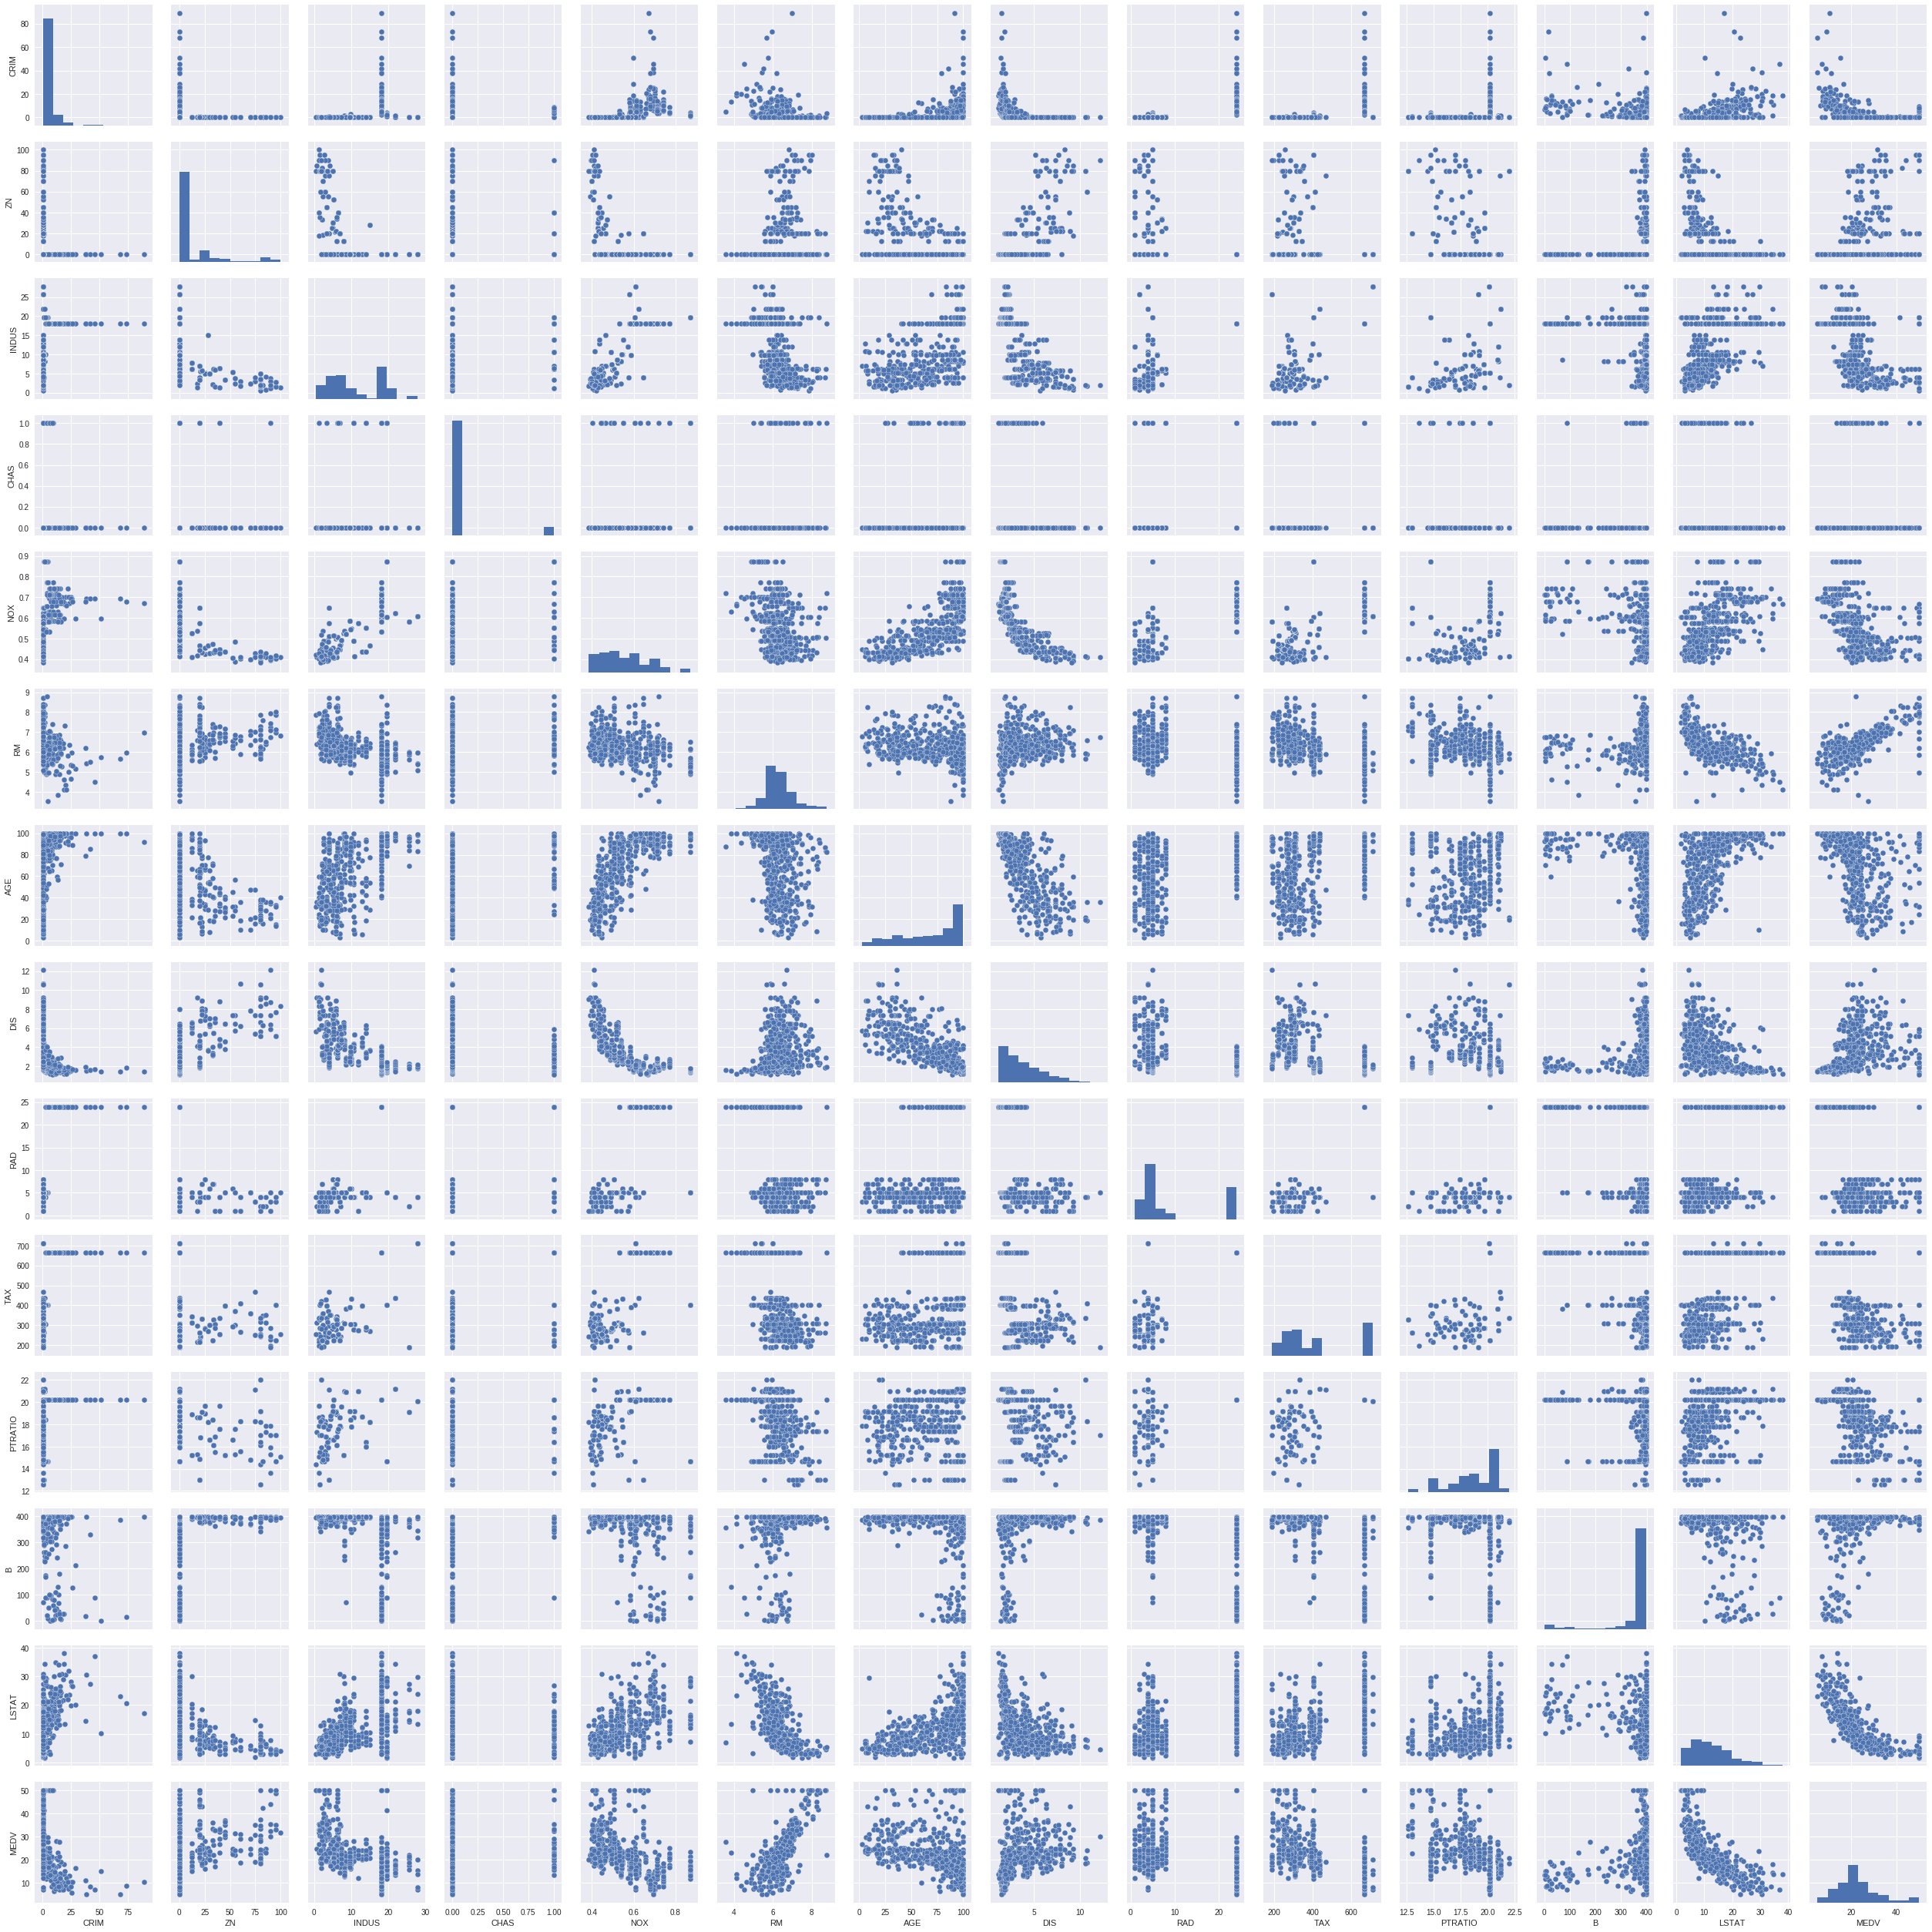

In [0]:
# Напишите код, который будет рисовать распределения попарно


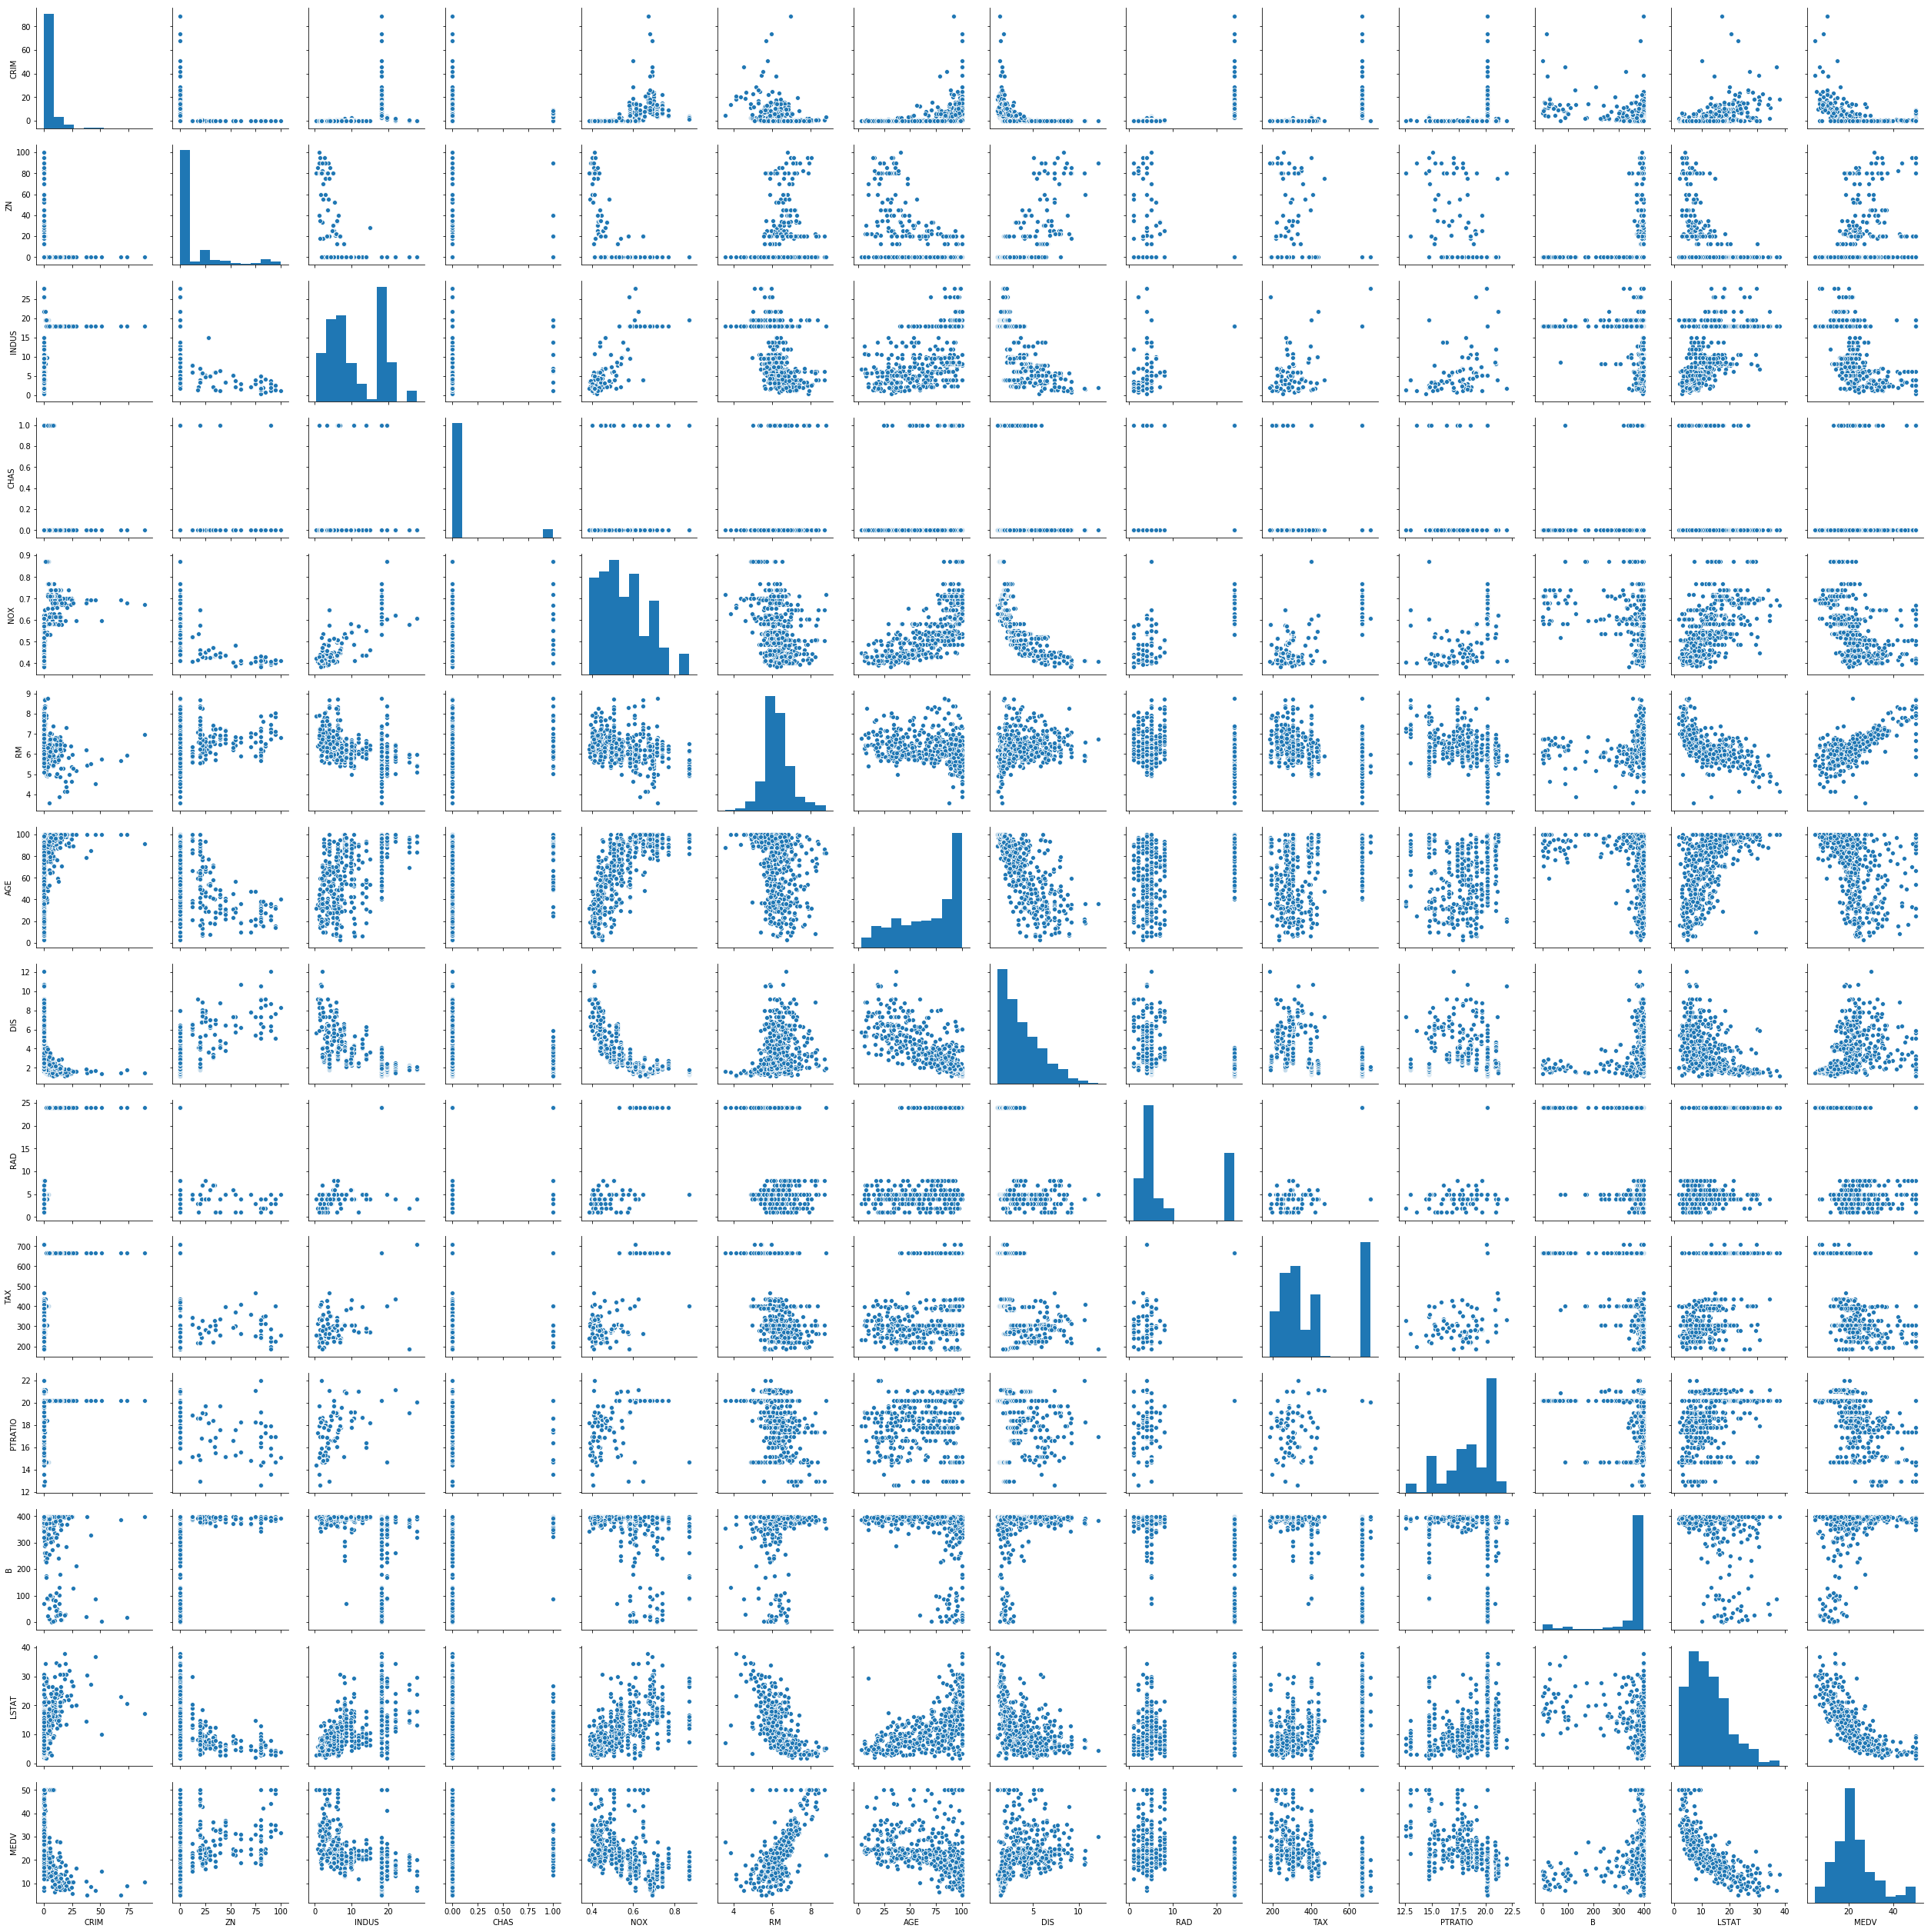

In [13]:
#решение
sns.pairplot(data)

<function matplotlib.pyplot.show(*args, **kw)>

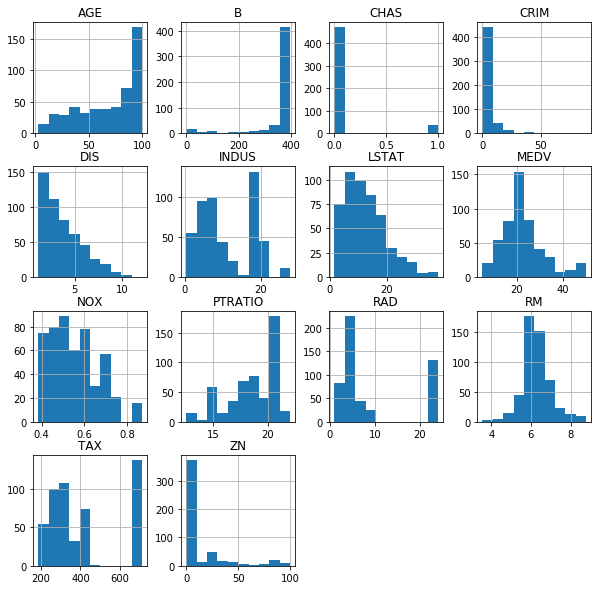

In [8]:
data.hist(figsize = (10, 10))
plt.show

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?

Распределение переменных MEDV и RM напоминают нормальное распределние (У MEDV есть нехарактерное увеличение частот в правой границе значений. Возможно, его можно считать незначительным, или нужно изучить дополнительно).

Переменная CHAS имеет распределение Бернулли, так как принимает значения либо 0, либо 1.

Переменная DIS напоминает экспоненциальное распределение (значения переменной не дискретны).

Переменная RAD напоминает в левой части биноминальное распределение (значения переменной дискретны). 

Распределение переменной LSTAT напоминает логнормальное.

Нет переменных, чье распределение было бы похоже на равномерное или на геометрическое.

**Загрузить таблицу iris. Нарисовать матрицу ковариаций попарно.**

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa


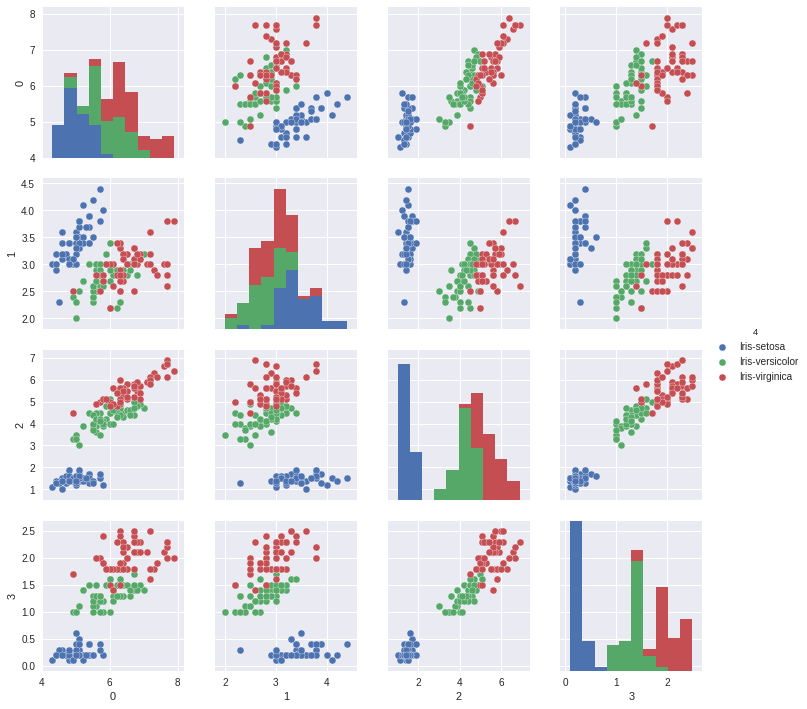

In [0]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
s=requests.get(url).content
# считайте данные и нарисуйте графики

Решение 

In [13]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
s=requests.get(url).content

data=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


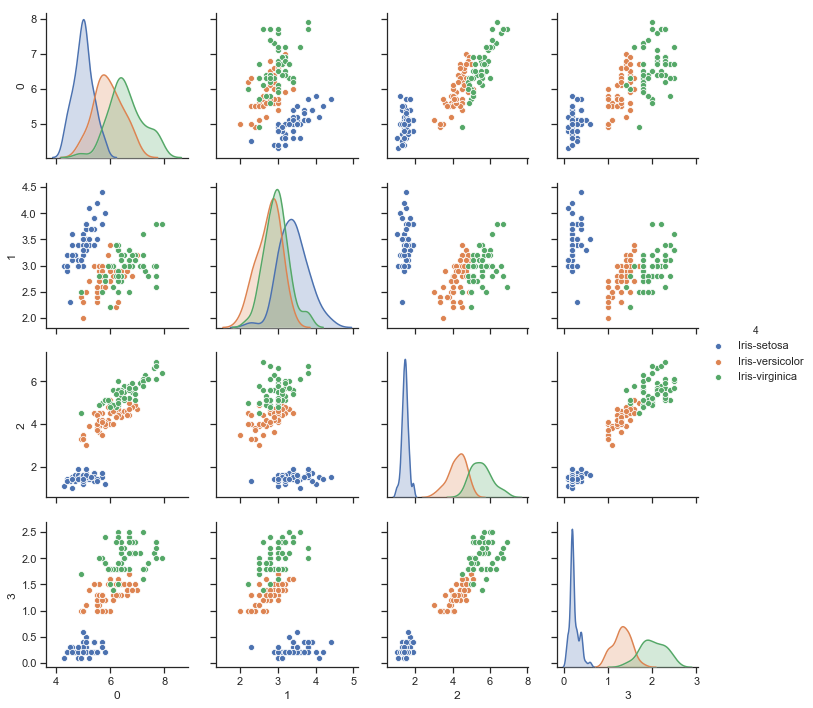

In [26]:
sns.pairplot(data, hue=4)

In [27]:
data.corr()

,0,1,2,3
0,1.000000,-0.109369,0.871754,0.817954
1,-0.109369,1.000000,-0.420516,-0.356544
2,0.871754,-0.420516,1.000000,0.962757
3,0.817954,-0.356544,0.962757,1.000000


Какие вектора из полученных метрик хорошо отделяют заданные выборки (можно провести прямую так, что два класса станут разными):


*   iris_setosa и iris_versicolor?
*   iris_versicolor и iris_virginica?
*   iria_virginica и iris_setosa?


Сгенерировать 2 класса выборок с разными средними значениями $m1 = \begin{bmatrix}-0.1\\ 1\end{bmatrix}$ и $m2 = \begin{bmatrix}0,7\\0\end{bmatrix}$ и одинаковой матрицей ковариаций $C = \begin{bmatrix}
2 & -1\\ 
-1 & 2
\end{bmatrix}$

In [30]:
# напишите код генерации двух выборок
cov1 = cov2 = np.array([[2, -1], [-1, 2]] )
m1 = np.array([-0.1, 1])
m2 = np.array([0.7, 0])

Нарисовать контур (6 контуров ) распределений

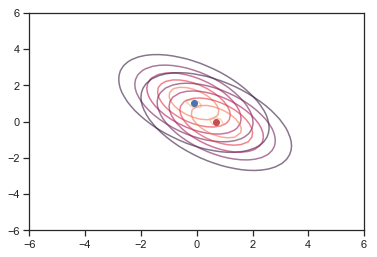

In [31]:
# напишите код для генерации 6 контуров для каждой из выборок
from scipy.stats import multivariate_normal as mvn
nGrid = 50
x1, y1 = np.meshgrid(np.linspace(-6,6,nGrid),np.linspace(-6,6,nGrid))
s1 = np.column_stack([x1.flat, y1.flat])

x2, y2 = np.meshgrid(np.linspace(-6,6,nGrid),np.linspace(-6,6,nGrid))
s2 = np.column_stack([x2.flat, y2.flat])

plt.plot(m1[0], m1[1], 'bo')
plt.plot(m2[0], m2[1], 'ro')

# Графики распределений
z1 = mvn.pdf(s1, m1, cov1).reshape(x1.shape)
z2 = mvn.pdf(s2, m2, cov2).reshape(x2.shape)
# рисуем контуры для распределений
plt.contour(x1, y1, z1, 6, alpha=0.6)
plt.contour(x2, y2, z2, 6, alpha=0.6)

Сгенерируйте данные для двух выборок с разными средними значениями, но одинаковыми разбросами

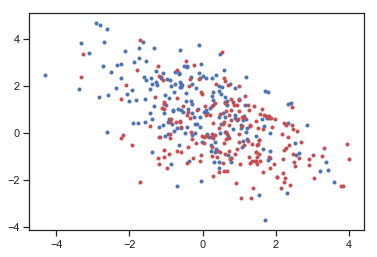

In [39]:
# сгенерируйте 200 данных с помощью кода
N = 200

data1 = np.column_stack(np.random.multivariate_normal(m1, cov1, N))
data2 = np.column_stack(np.random.multivariate_normal(m2, cov2, N))

scatter1 = plt.plot(data1[0], data1[1], 'b.')
scatter2 = plt.plot(data2[0], data2[1], 'r.')


Сгенерируйте 20 данных и сравните с предыдущим графиком. Что поменялось? Какое это распределение может быть?

*Поменялась картина - по выборке из 20 элементов сложно увидеть скопления, следовательно сложно сделать вывод о виде распределния*

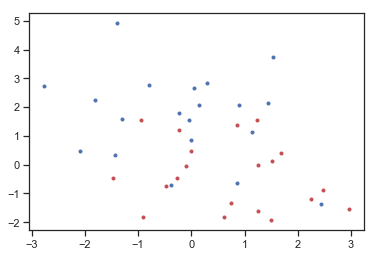

In [40]:
# сгенерируйте 20 данных. Какое это распределение может быть?
N1 = 20
data1_ = np.column_stack(np.random.multivariate_normal(m1, cov1, N1))
data2_ = np.column_stack(np.random.multivariate_normal(m2, cov2, N1))

scatter1 = plt.plot(data1_[0], data1_[1], 'b.')
scatter2 = plt.plot(data2_[0], data2_[1], 'r.')

# plt.show()

Можно ли отнести эти данные к распределению Стьюдента? Почему?

*На мой взгляд, по выборке из 20 элементов и полученному распределению невозможно достоверно судить о виде распределения*

Посчитать вектор направления Фишера используя средние значения и матрицу ковариаций, и постройте график на плоскости.

Text(0.5, 1.0, 'Выборки и вектор Фишера')

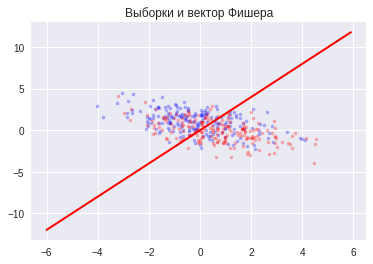

In [0]:
# код для подсчета вектора Фишера и проекции данных на него


Text(0.5, 1.0, 'Выборки и вектор Фишера')

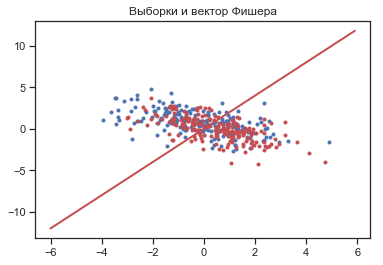

In [41]:
# код для подсчета вектора Фишера и проекции данных на него

from numpy.linalg import inv as inv
data1 = np.column_stack(np.random.multivariate_normal(m1, cov1, N))
data2 = np.column_stack(np.random.multivariate_normal(m2, cov2, N))

scatter1 = plt.plot(data1[0], data1[1], 'b.')
scatter2 = plt.plot(data2[0], data2[1], 'r.')
wF = inv(cov1 + cov2).dot(m1.T-m2.T)
xx = np.arange(-6,6,0.1)
yy = -xx.dot(wF[1]/wF[0])
fisher_line = plt.plot(xx, yy, 'r', linewidth=2)
plt.title("Выборки и вектор Фишера")

Почему вектор выбран именно в этом направлении?

*Вектор макс-но удаляет средние значения выборок при минимальном пересечении разброса этих выборок*